# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

## Generate Cities List

In [2]:
# Generate latitudes(-90 to 90) and longitudes(-180 to 180) using random number generator
cities=pd.DataFrame({"long":(np.random.uniform(-180,180,5000)), "lat":(np.random.uniform(-90,90,5000))})
len(cities)

5000

In [3]:
cities_name=[]

for i in range(0,len(cities['lat'])):
    lat=cities.iloc[i]['lat']
    long=cities.iloc[i]["long"]
    city=citipy.nearest_city(lat,long)
    name=city.city_name
    cities_name.append(name)

# removing duplicate cities returned by nearest_city function
unique_cities = [x for n, x in enumerate(cities_name) if x not in cities_name[:n]]
len(unique_cities)
#len(list(dict.fromkeys(cities_name)))

1394

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_speed = []
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"    #q={city name}&appid={API key}
# Build partial query url
query_url = f'{url}appid={weather_api_key}&q='

set_i = 1
a=0
b=50
for set in range(13):

    for city in unique_cities[a:b]:
        response = requests.get(f'{query_url} + {city}').json()
        try:
            City.append(response['name'])
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Humidity.append(response['main']['humidity'])
            Cloudiness.append(response['clouds']['all'])
            Wind_speed.append(response['wind']['speed'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
            print(f'Processing Record {len(City)} of Set:{set_i} | {response["name"]}')
        except:
            print("City not found. Skipping...")
            pass
    a=a+50
    b=b+50
    set_i = set_i + 1

Processing Record 1 of Set:1 | Dikson
City not found. Skipping...
Processing Record 2 of Set:1 | New Norfolk
Processing Record 3 of Set:1 | Slave Lake
City not found. Skipping...
Processing Record 4 of Set:1 | Hasaki
Processing Record 5 of Set:1 | Aleksandrovsk-Sakhalinskiy
Processing Record 6 of Set:1 | Gimli
Processing Record 7 of Set:1 | Ushuaia
Processing Record 8 of Set:1 | Kahului
Processing Record 9 of Set:1 | Yellowknife
Processing Record 10 of Set:1 | Punta Arenas
Processing Record 11 of Set:1 | Busselton
Processing Record 12 of Set:1 | Bluff
Processing Record 13 of Set:1 | Derbent
Processing Record 14 of Set:1 | Cayenne
Processing Record 15 of Set:1 | Namibe
Processing Record 16 of Set:1 | Saint-Pierre
Processing Record 17 of Set:1 | Kasongo-Lunda
Processing Record 18 of Set:1 | Saskylakh
Processing Record 19 of Set:1 | Cape Town
Processing Record 20 of Set:1 | Bredasdorp
Processing Record 21 of Set:1 | Vaini
Processing Record 22 of Set:1 | Bloemfontein
Processing Record 23 o

Processing Record 177 of Set:5 | Paamiut
Processing Record 178 of Set:5 | Salym
Processing Record 179 of Set:5 | Barra do Garcas
Processing Record 180 of Set:5 | Moroni
Processing Record 181 of Set:5 | Lagoa
Processing Record 182 of Set:5 | Yermakovskoye
City not found. Skipping...
Processing Record 183 of Set:5 | Kiunga
Processing Record 184 of Set:5 | Grindavik
Processing Record 185 of Set:5 | Ukholovo
Processing Record 186 of Set:5 | San-Pedro
Processing Record 187 of Set:5 | Bengkulu
Processing Record 188 of Set:5 | Chota
Processing Record 189 of Set:5 | Kosh-Agach
Processing Record 190 of Set:5 | Kropotkin
Processing Record 191 of Set:5 | Abaza
City not found. Skipping...
Processing Record 192 of Set:5 | Cartagena del Chaira
Processing Record 193 of Set:5 | Al
Processing Record 194 of Set:5 | Kontagora
Processing Record 195 of Set:5 | Codrington
Processing Record 196 of Set:5 | Benghazi
Processing Record 197 of Set:5 | Maldonado
Processing Record 198 of Set:5 | Pangnirtung
Process

Processing Record 354 of Set:9 | Kavieng
Processing Record 355 of Set:9 | Svetlaya
Processing Record 356 of Set:9 | Port Lincoln
Processing Record 357 of Set:9 | Ust-Maya
Processing Record 358 of Set:9 | Flinders
Processing Record 359 of Set:9 | Zvishavane
Processing Record 360 of Set:9 | Saint-Augustin
Processing Record 361 of Set:9 | Batemans Bay
Processing Record 362 of Set:9 | Yantal
Processing Record 363 of Set:9 | New Glasgow
City not found. Skipping...
Processing Record 364 of Set:9 | Silver City
City not found. Skipping...
City not found. Skipping...
Processing Record 365 of Set:9 | Aykhal
Processing Record 366 of Set:9 | San Jose
Processing Record 367 of Set:9 | Cavalcante
Processing Record 368 of Set:9 | Mount Isa
Processing Record 369 of Set:9 | Chicama
Processing Record 370 of Set:9 | Great Falls
Processing Record 371 of Set:9 | Dudinka
Processing Record 372 of Set:9 | Isla Vista
Processing Record 373 of Set:9 | Hirado
Processing Record 374 of Set:9 | Kruisfontein
Processin

Processing Record 527 of Set:13 | Lac du Bonnet
Processing Record 528 of Set:13 | Chambar
City not found. Skipping...
Processing Record 529 of Set:13 | Morondava
Processing Record 530 of Set:13 | Mandera
Processing Record 531 of Set:13 | Umm Kaddadah
Processing Record 532 of Set:13 | Hemsedal
Processing Record 533 of Set:13 | Balikpapan
Processing Record 534 of Set:13 | Nichinan
City not found. Skipping...
Processing Record 535 of Set:13 | Mikkeli
Processing Record 536 of Set:13 | Cockburn Town
Processing Record 537 of Set:13 | Gari
Processing Record 538 of Set:13 | Moberly
Processing Record 539 of Set:13 | Port Macquarie
City not found. Skipping...
Processing Record 540 of Set:13 | Alyangula
Processing Record 541 of Set:13 | Caronport
Processing Record 542 of Set:13 | Buchanan
Processing Record 543 of Set:13 | Lakes Entrance
Processing Record 544 of Set:13 | Muzhi
Processing Record 545 of Set:13 | Aleksandrov Gay
Processing Record 546 of Set:13 | Isiro
Processing Record 547 of Set:13 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# creating weather DataFrame
weather_df = pd.DataFrame({
    "City" : City,
    "Lat" : Lat,
    "Lng" : Lng,
    "Max Temp" : Max_Temp,
    "Humidity" : Humidity,
    "Cloudiness" : Cloudiness,
    "Wind Speed" : Wind_speed,
    "Country" : Country,
    "Date" : Date
})
weather_df.head()
weather_df.to_csv("weather.csv")

In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,21.396194,18.658830,288.709018,70.592857,57.169643,3.682036,1.634969e+09
std,33.326572,90.720725,11.429151,21.399061,38.536299,2.661987,2.298530e+02
min,-54.800000,-175.200000,248.320000,9.000000,0.000000,0.000000,1.634969e+09
25%,-7.197000,-57.636575,280.695000,57.000000,18.000000,1.717500,1.634969e+09
50%,27.889850,20.100700,290.135000,75.000000,68.500000,3.040000,1.634969e+09
75%,50.495300,95.532100,297.987500,87.000000,97.000000,5.232500,1.634969e+09
max,78.218600,179.316700,313.140000,100.000000,100.000000,13.890000,1.634970e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#checking if any cities have >100% humidity
print(f'{sum(weather_df["Humidity"] > 100)} cities have a humidity > 100%')
df = weather_df.head(100)

0 cities have a humidity > 100%


In [8]:
#  Get the indices of cities that have humidity over 100%.
hum_out = weather_df[weather_df["Humidity"] > 100].index

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(hum_out, inplace=False)
clean_city_data.describe()
sum(clean_city_data.duplicated())

0

In [10]:
### FURTHER CLEANING DATA - DATE AND TEMPERATURE COLUMNS NEED TO BE CONVERTED
# created new col ("Simple_date") to convert Date from unix UTC to datetime
clean_city_data["Simple_Date"] = clean_city_data["Date"].apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
# substituded Max Temp from K to F using formula
clean_city_data["Max Temp"] = round((clean_city_data["Max Temp"] - 273.15) * 9/5 + 32 ,2)
# substitute Wind Speed from Default (meter/sec) to Imperial
clean_city_data["Wind Speed"] = round(clean_city_data["Wind Speed"]*2.237, 2)

In [11]:
# created new col ("Simple_date") to convert Date from unix UTC to datetime
clean_city_data["Simple_Date"] = clean_city_data["Date"].apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

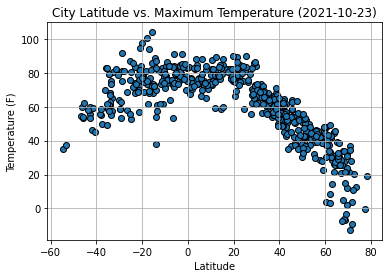

In [12]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], edgecolor="black")
plt.grid()
plt.title(f'City Latitude vs. Maximum Temperature ({clean_city_data["Simple_Date"][0]})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig('output/Latitude_vs._Temperature_Plot.png')

In [13]:
### the above plot shows an inverse "U" relationship. Temperatures are lower as you get further away from the equator.

## Latitude vs. Humidity Plot

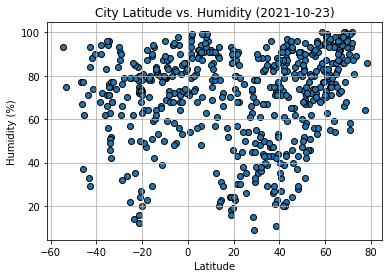

In [14]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], edgecolor="black")
plt.grid()
plt.title(f'City Latitude vs. Humidity ({clean_city_data["Simple_Date"][0]})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('output/Latitude_vs_Humidity_Plot.png')
plt.show()

In [15]:
### the above plot shows that there does not appear to be a relationship between humidity and latitude

## Latitude vs. Cloudiness Plot

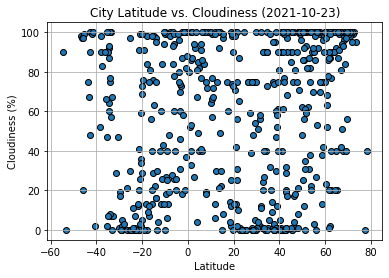

In [16]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], edgecolor="black")
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({clean_city_data["Simple_Date"][0]})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('output/Latitude_vs_Cloudiness_Plot.png')
plt.show()

In [17]:
### the above plot shows that there does not appear to be a relationship between cloudiness and latitude

## Latitude vs. Wind Speed Plot

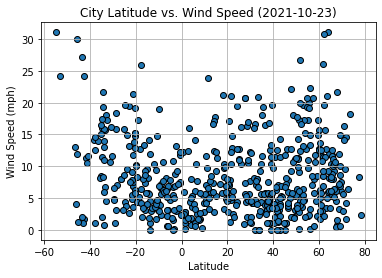

In [18]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], edgecolor="black")
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({clean_city_data["Simple_Date"][0]})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('output/Latitude_vs_Wind_Speed_Plot.png')
plt.show()

In [19]:
### the above plot shows that there does not appear to be a relationship between wind speed and latitude

## Linear Regression

In [20]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hem = clean_city_data[clean_city_data["Lat"] >= 0]
# Southern Hemisphere (less than 0 degrees latitude)
south_hem = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7830827339367866


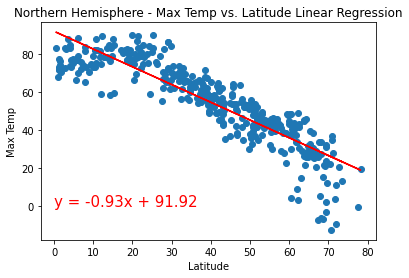

In [21]:
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output/N_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.33173546543522925


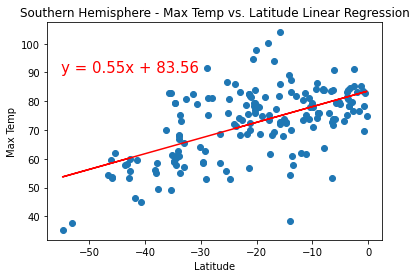

In [22]:
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output/S_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png')
plt.show()

In [23]:
### Northern Hemisphere: There appears to be a strong negative correlation between Max Temp and Latitude
###                      As latitude increases, Max Temperature decreases.

### Southern Hemisphere: There appears to be a weak positive correlation between Max Temp and Latitude
###                      As latitude increases, Max Temperature increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.042841883294153074


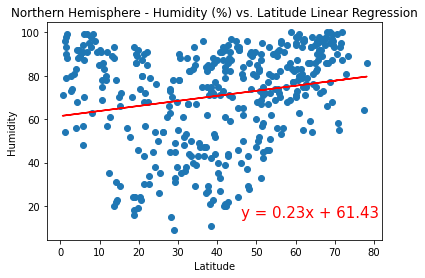

In [24]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig('output/N_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010042739296415264


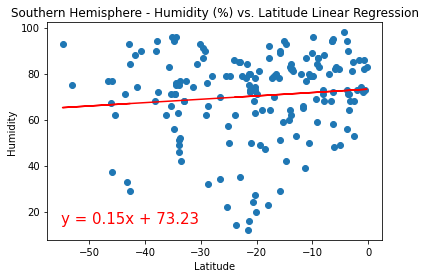

In [25]:
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig('output/S_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
### Northern and Southern Hemisphere: there seems to be a very weak positive correlation between Humidity and Latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04611917568886115


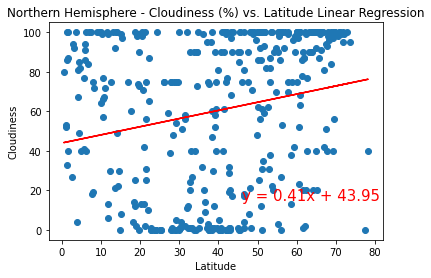

In [27]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('output/N_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006353950876402967


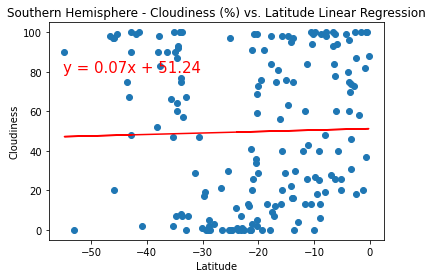

In [28]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('output/S_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [29]:
### Northern and Southern Hemisphere:  there appears to be no correlation between Humidity and Latitude

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.029565787291950335


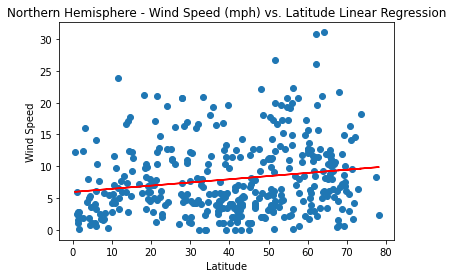

In [30]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('output/N_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18608252832423328


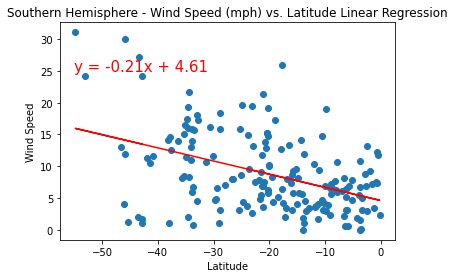

In [31]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('output/S_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png')
plt.show()

In [32]:
### Northern Hemisphere: there appears to be a very weak or no correlation between Wind Speed and Latitude
### Southern Hemisphere: there appears very weak negative correlation between Wind Speed and Latitude

In [33]:
# exporting data to csv file
clean_city_data.to_csv("output/WeatherPy.csv")